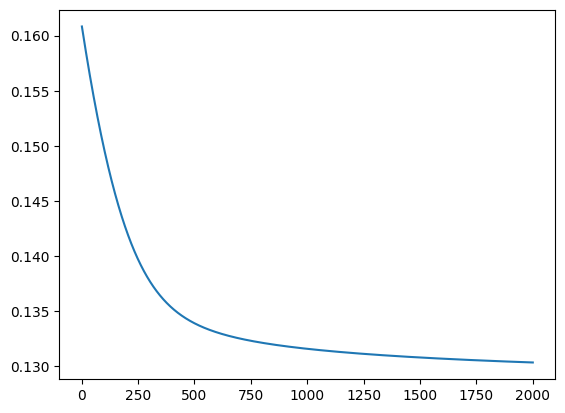

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

#导入数据
df=pandas.read_csv('breastCancer.csv')
df=df.drop(labels='bare_nucleoli' ,axis=1)
df=df.drop(labels='id' ,axis=1)
data=np.array(df,dtype = float)
m_all=np.shape(data)[0]#计算出数据样本总数
d=np.shape(data)[1]-1#计算出维度
for i in range(m_all):
    if data[i,d]==2:
        data[i,d]=0
    else: data[i,d]=1
#特征缩放

m_train=500#训练集个数
m_test=m_all-m_train#测试集个数
x_mean=np.mean(data[:,:d],axis=0)
x_std=np.std(data[:,:d],axis=0,ddof=1)
data[:,:d]=(data[:,:d]-x_mean)/x_std
x_train=data[:m_train,:d].T
y_train=data[:m_train,d].reshape(1,-1)
x_test=data[m_train:,:d].T
y_test=data[m_train:,d].reshape(1,-1)

#train_set=data[:m_train,:]
cost_save=[]

#设置超参数
learning_rate=0.1
iteration=2000
#rng=np.random.default_rng(1)
w=np.ones((1,d)).reshape(-1,1)
b=0
v=np.ones((1,m_train)).reshape(1,-1)
#训练
for i in range(iteration):
    #rng.shuffle(train_set)
    #for start_sample in range(0,m_train,batch):
    #start_sample=min([batch,m_train-start_sample])
    #X=train_set[start_sample:start_sample+batch,:d].T
    #Y=train_set[start_sample:start_sample+batch,d].T
    z=np.dot(w.T,x_train)+b
    y_hat=1/(1+np.exp(-z))
    y_hat_ba=1-y_hat
    y_train_ba=1-y_train
    e=y_hat-y_train
    w=w-learning_rate*np.dot(x_train,e.T)/m_train
    b=b-learning_rate*np.dot(v,e.T)/m_train
    cost=-(np.dot(np.log(y_hat),y_train.T)+np.dot(np.log(y_hat_ba),y_train_ba.T))/m_train
    cost_save.append(cost.item(0))
plt.plot(range(1,len(cost_save)+1),cost_save)
plt.show()

